# Zillow Housing SQL Analysis


## by Wolfrank Guzman
@guzmanwolfrank:GitHub
#
email: guzmanwolfrank@gmail.com 



#### Objective:  Our objective is to use SQL queries to help analyze data from Zillow's Top Tier Housing Data.  Our goals are to see what changes have occured on Top Tier Home Values in all 50 states and Washington DC.  



Zillow publishes top-tier ZHVI ($, typical value for homes within the 65th to 95th percentile range for a given region) and bottom-tier ZHVI.

A user guide for this data can be found at: [Zillow](https://www.zillow.com/research/zhvi-user-guide/). 




### Import Libraries and Load Data from CSV File 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv 
import numpy as np 
import warnings 
from pandasql import sqldf
# Ignore all warnings 
warnings.filterwarnings('ignore')


# Load your data into a DataFrame (assuming it's in a CSV file)

csv_file = r"C:\Users\Wolfrank\Desktop\Zillow.csv"
data = pd.read_csv(csv_file)
df = data


### Cleaning the Data 


After importing our libraries, let's clean the data by removing unnecessary columns.  Then, we add 1 to the Index and Size Rank columns.  We check the number of columns and display the resulting dataframe. 

In [2]:

# Next we clean up the data in the dataframe we just created, then we save the new file.

# Data Cleaning:  Drop Columns 
columns_to_remove = ['RegionID', 'RegionType', 'StateName',]
data.drop(columns=columns_to_remove, inplace=True)

# Rename Column from RegionName to State
df.rename(columns={'RegionName': 'State'}, inplace=True)

# Add 1 to Index 
df.index = df.index + 1

# Add 1 to SizeRank 
df['SizeRank'] = df['SizeRank'] + 1

# Show number of columns
num_columns = len(data.columns)
print("Number of columns:", num_columns)

display(df)

Number of columns: 51


,SizeRank,State,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
1,1,California,"1,010,157.03","1,012,997.20","1,017,687.95","1,022,485.24","1,026,952.62","1,031,142.67","1,034,553.47","1,038,088.60",...,"1,388,930.11","1,376,351.17","1,365,640.69","1,349,536.48","1,331,812.63","1,318,644.67","1,313,776.90","1,316,454.54","1,325,324.18","1,341,108.82"
2,2,Texas,"357,269.45","357,782.32","358,412.61","359,412.86","360,688.93","362,151.96","363,891.37","365,822.27",...,"532,105.51","528,545.81","524,829.49","521,187.45","518,476.90","517,509.82","517,123.74","517,491.48","518,693.11","520,137.03"
3,3,Florida,"418,248.13","418,802.55","419,552.05","420,841.50","422,743.27","425,119.60","427,888.45","430,657.11",...,"671,682.72","670,050.89","667,964.77","664,787.53","661,775.13","661,015.61","661,671.22","663,656.64","666,775.03","670,282.22"
4,4,New York,"690,210.31","693,015.33","693,910.26","693,100.09","693,893.69","695,226.93","698,205.02","699,981.70",...,"844,798.50","840,894.00","835,562.38","830,563.40","826,754.70","826,619.79","828,228.14","831,973.72","837,724.80","844,885.84"
5,5,Pennsylvania,"335,935.47","336,900.44","337,641.14","338,545.74","339,749.56","341,004.42","342,010.48","343,080.18",...,"442,150.02","442,246.20","442,397.14","441,695.92","441,335.83","442,410.63","444,593.91","447,405.56","450,479.79","454,024.12"
6,6,Illinois,"357,412.36","356,471.43","355,391.39","354,901.90","354,797.42","355,092.67","355,916.39","357,078.08",...,"431,662.33","430,503.82","429,329.67","428,739.96","428,391.45","429,022.68","429,375.42","430,677.89","433,281.28","436,567.53"
7,7,Ohio,"272,835.08","273,670.82","274,235.67","275,015.43","276,117.20","277,291.76","278,632.96","279,996.30",...,"371,393.22","371,248.72","371,095.11","371,301.90","371,832.66","373,447.41","375,182.41","377,375.30","379,453.14","381,272.81"
8,8,Georgia,"357,878.82","358,461.71","359,081.64","360,062.20","361,342.18","363,000.74","364,967.97","367,159.45",...,"524,631.21","522,735.07","520,415.83","518,330.42","516,799.91","517,033.03","517,620.21","519,478.18","522,161.75","525,356.70"
9,9,North Carolina,"355,739.44","356,297.63","356,922.47","358,036.28","359,549.58","361,386.43","363,186.53","365,085.51",...,"540,551.45","538,276.84","535,798.16","533,270.51","531,354.74","531,537.40","532,334.40","534,778.51","538,365.26","542,623.91"
10,10,Michigan,"299,772.62","299,910.94","299,882.68","300,244.12","301,048.21","301,914.79","303,047.67","304,480.98",...,"397,356.16","395,913.24","394,584.94","394,051.71","394,175.00","395,806.96","397,219.51","399,235.77","401,152.93","402,754.27"


In [3]:
# Get the column names and join them with a comma
column_names = ','.join(df.columns)
print(column_names)


SizeRank,State,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023


### SQL Queries 

Load the CSV data into a SQLite Database and connect to the database.  We can then write a list of SQL Queries for analysis and to generate results. 

In [4]:
# Load the CSV data into a SQLite database
con = sqlite3.connect('zillow_data.db')

df.to_sql('zillow_data', con, if_exists='replace', index=False)

# Define SQL queries for analysis
query1 = """
SELECT State, AVG("7/31/2019") AS AvgHomeValue
FROM zillow_data
GROUP BY State
"""

query2 =  """
SELECT State, AVG("7/31/2023") AS AvgHomeValue
FROM zillow_data
GROUP BY State
"""

query3 = """
SELECT State, AVG("7/31/2023") AS AvgHomeValue
FROM zillow_data
GROUP BY State
ORDER BY AvgHomeValue DESC
LIMIT 5
"""

query4 = """
SELECT State, ("7/31/2023" - "7/31/2019") AS ChangeInValue
FROM zillow_data
ORDER BY ChangeInValue DESC
LIMIT 5
"""

query5 =  """
SELECT AVG("7/31/2023") AS average_value
FROM zillow_data
WHERE State = 'New York';
"""
query6 = """
SELECT AVG("7/31/2023") AS average_value
FROM zillow_data
WHERE State = 'New Jersey';
"""
query7 = """ 
SELECT *
FROM zillow_data
WHERE (State = 'New York' OR State = 'New Jersey')
  AND "7/31/2018" <= "7/31/2023";
"""
# Execute queries and fetch results
query_results = []

for query in [query1, query2, query3, query4, query5, query6, query7]:
    result = pd.read_sql_query(query, con)
    query_results.append(result)


### Seaborn Visualizations 

We can use the output of the SQL Queries to construct visualizations such as histograms of the data we have cleaned and queried. 

Text(0, 0.5, 'State')

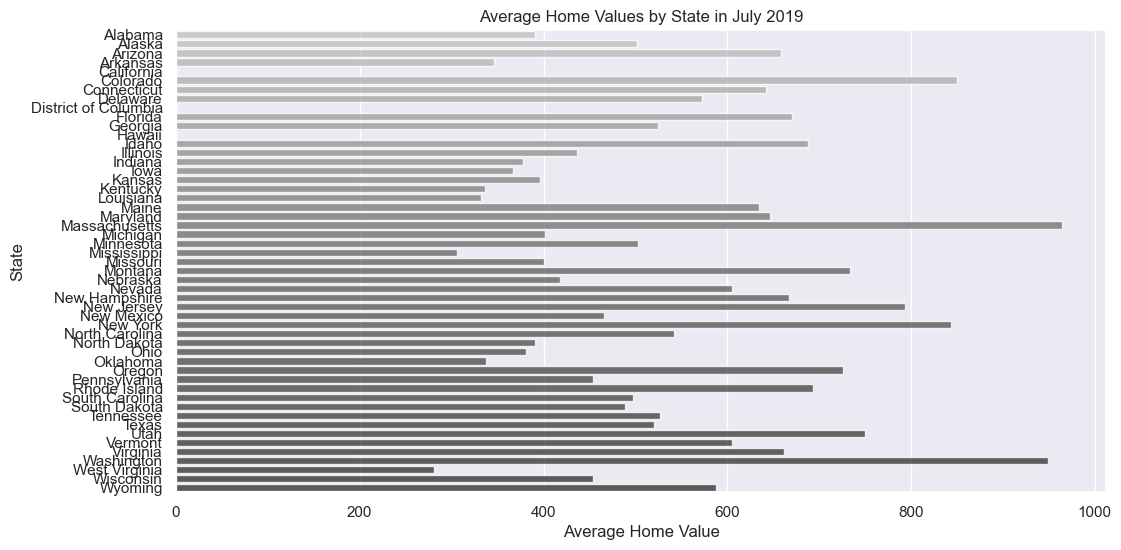

In [5]:

# Create Seaborn charts
sns.set(style="darkgrid")

# Chart 1: Average home values by state in September 2019
plt.figure(figsize=(12, 6))
sns.barplot(data=query_results[1], x='AvgHomeValue', y='State',palette="Greys_d", alpha=0.8)
plt.title('Average Home Values by State in July 2019')
plt.xlabel('Average Home Value')
plt.ylabel('State')


Text(0, 0.5, 'State')

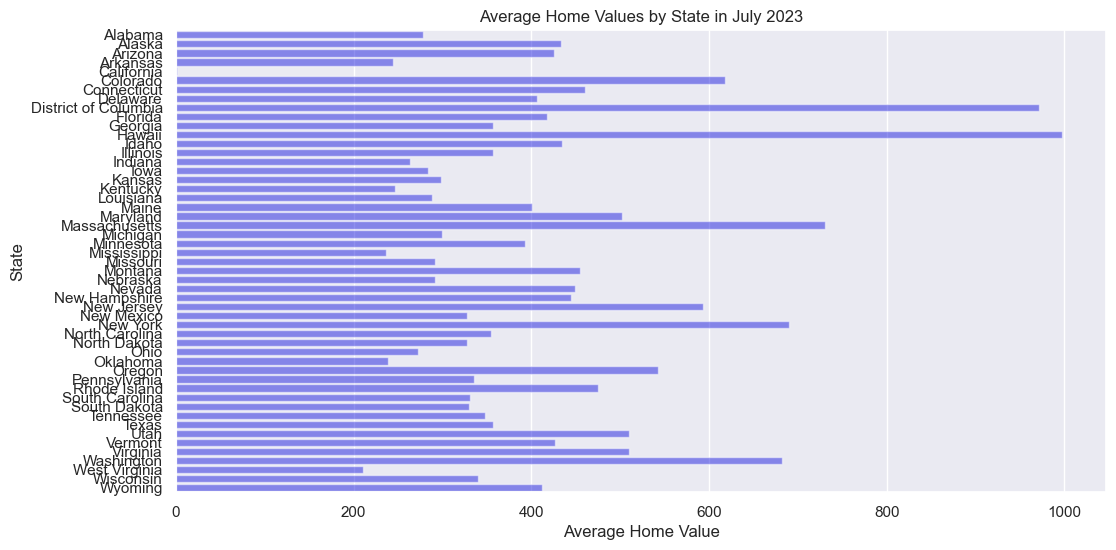

In [6]:

# Chart 2: Average home values by state in September 2021
plt.figure(figsize=(12, 6))
sns.barplot(data=query_results[0], x='AvgHomeValue', y='State',color="blue", alpha=0.5)
plt.title('Average Home Values by State in July 2023')
plt.xlabel('Average Home Value')
plt.ylabel('State')


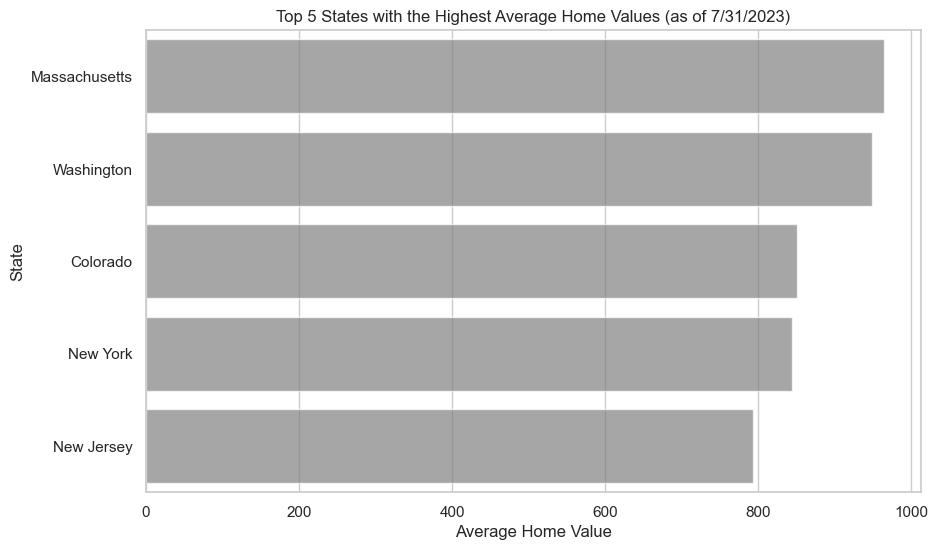

In [7]:
# Chart 3:  Top 5 States with Highest Average Top Tier Home Values
df = pd.read_sql_query(query3, con)
# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=df, x='AvgHomeValue', y='State', color="grey", alpha=0.7)
plt.title('Top 5 States with the Highest Average Home Values (as of 7/31/2023)')
plt.xlabel('Average Home Value')
plt.ylabel('State')
plt.show()

Here we see that the state with highest change in home value between July 2019 and July 2023 was Montana. Washington came in second whil Idaho, Florida and Utah rounded out the list. 

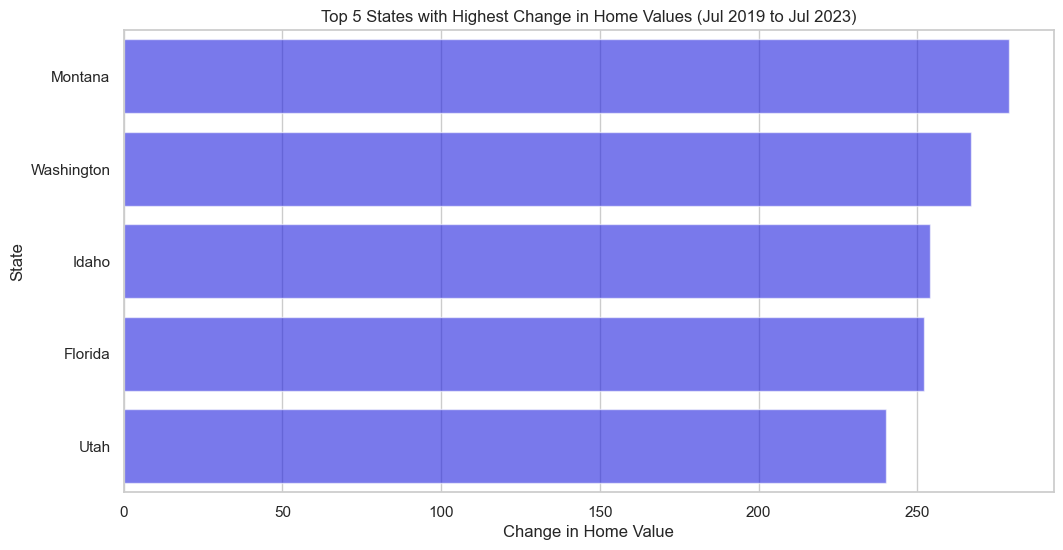

In [8]:

#Chart 4: Top 5  Highest Change in Top Tier Home Value 
result4 = pd.read_sql_query(query4, con)
# Create Seaborn histogram chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=result4, x='ChangeInValue', y='State', color="blue", alpha=0.6)
plt.title('Top 5 States with Highest Change in Home Values (Jul 2019 to Jul 2023)')
plt.xlabel('Change in Home Value')
plt.ylabel('State')
# Show the Charts
plt.show()


By overlaying the data from 2019 and 2023 we can see the change in price frequency at certain price points.  

This stacked count histogram shows us that there was a higher amount of mid priced homes at 200 to 400k in 2019 and that inventory has shrunken.  It has been replaced by higher priced homes amongst a smaller number of states-- as shown by the lower frequency counts. 

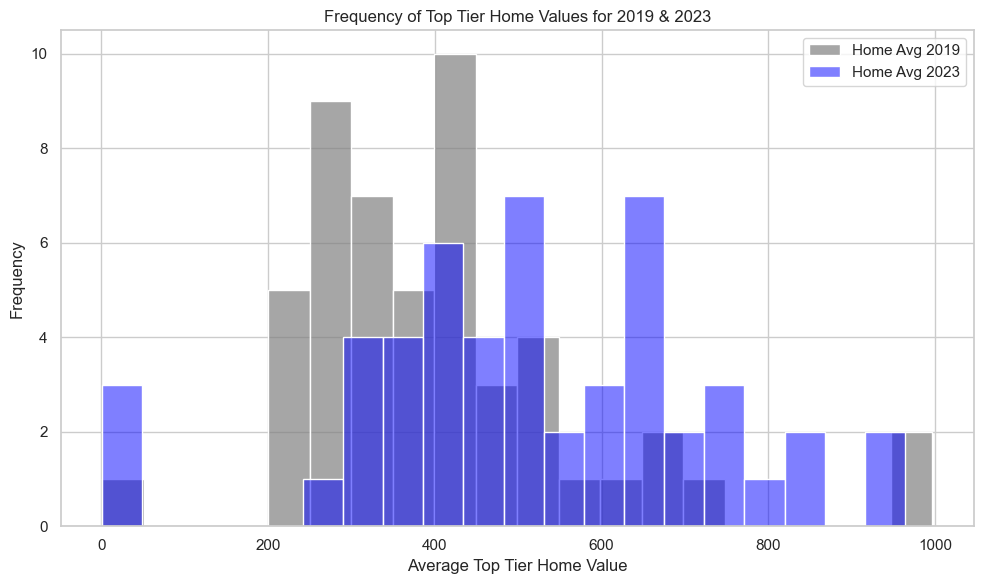

In [9]:

# Chart 5: Top Tier Home Value Frequency for 2019 and 2023
df1 = pd.read_sql_query(query1, con)
df2 = pd.read_sql_query(query2, con)
# Create stacked histograms using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df1['AvgHomeValue'], bins=20, color='grey', alpha=0.7, label='Home Avg 2019')
sns.histplot(df2['AvgHomeValue'], bins=20, color='blue', alpha=0.5, label='Home Avg 2023')
plt.title('Frequency of Top Tier Home Values for 2019 & 2023')
plt.xlabel('Average Top Tier Home Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In the two line chart below, we can visualize the average values in 2019 and 2023.  These values are identified by their corresponding State in the X-axis.  We can also see the sharp discrepancy between different states in terms of average value.  

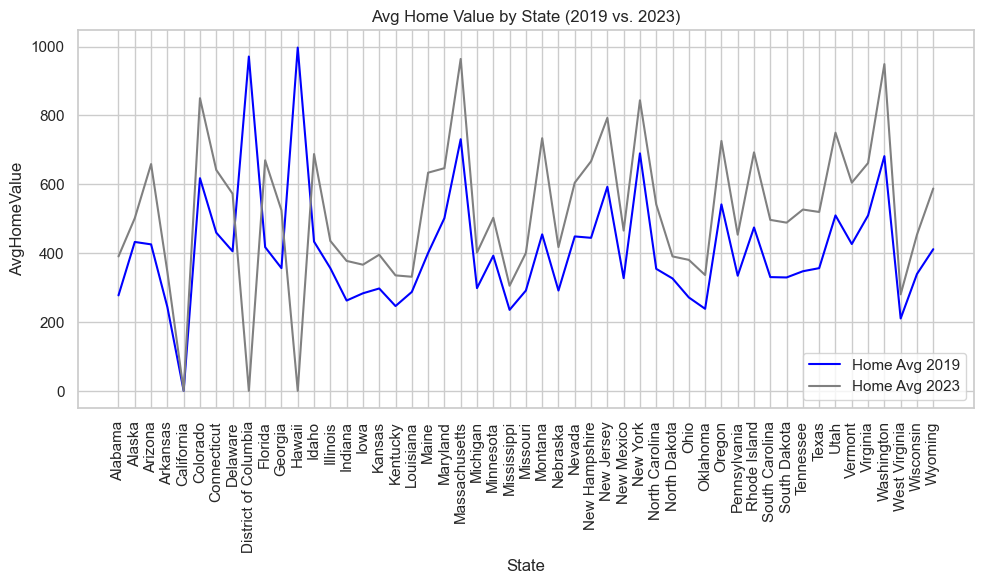

In [10]:
# Chart 6:  Average Top Tier Home Value
df1 = pd.read_sql_query(query1, con)
df2 = pd.read_sql_query(query2, con)

# Create a two-line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='State', y='AvgHomeValue', label='Home Avg 2019', color='blue')
sns.lineplot(data=df2, x='State', y='AvgHomeValue', label='Home Avg 2023', color='grey')

plt.title('Avg Home Value by State (2019 vs. 2023)')
plt.xlabel('State')
plt.ylabel('AvgHomeValue')
plt.legend()
plt.grid(True)
# Rotate the X-axis text by 90 degrees
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Next we can take a look at specific locations.  In this instance we will Query New York and New Jersey and note any discrepancies in value. 

In [11]:


# Define the SQL query to calculate the average
query5 = """
SELECT AVG("7/31/2023") AS average_value
FROM zillow_data
WHERE State = 'New York';
"""

# Execute the SQL query
cursor = con.execute(query5)
result = cursor.fetchone()


# Print the average value
average_value = result[0]
print(f"The average home value for New York Top Tier Homes according to Zillow on 7/31/2023 is: {average_value*1000}")


The average home value for New York Top Tier Homes according to Zillow on 7/31/2023 is: 844000.0


In [12]:


# Define the SQL query to calculate the average
query6 = """
SELECT AVG("7/31/2023") AS average_value
FROM zillow_data
WHERE State = 'New Jersey';
"""

# Execute the SQL query
cursor = con.execute(query6)
result = cursor.fetchone()

# Close the database connection
#con.close()

# Print the average value
average_value = result[0]
print(f"The average home value for New Jersey Top Tier Homes according to Zillow on 7/31/2023 is: {average_value*1000}")


The average home value for New Jersey Top Tier Homes according to Zillow on 7/31/2023 is: 793000.0


Below we see a SQL Query that is filtered using Pandas that shows Zillow Top Tier Home Values for the last 4 years for New York and New Jersey. 

In [13]:
query7 = """ 
SELECT *
FROM zillow_data
WHERE (State = 'New York' OR State = 'New Jersey')
  AND "7/31/2018" <= "7/31/2023";
"""
filtered_df = pd.read_sql_query(query7, con)

display(filtered_df)

,SizeRank,State,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,4,New York,"690,210.31","693,015.33","693,910.26","693,100.09","693,893.69","695,226.93","698,205.02","699,981.70",...,"844,798.50","840,894.00","835,562.38","830,563.40","826,754.70","826,619.79","828,228.14","831,973.72","837,724.80","844,885.84"
1,11,New Jersey,"593,408.72","592,840.31","591,794.17","591,547.97","592,164.42","593,370.45","595,149.24","597,310.74",...,"773,073.48","771,173.78","769,823.76","770,023.00","770,577.23","773,515.11","776,188.98","780,695.41","786,469.30","793,233.56"


The Pandas DataFrame shows us that home values for top tier homes in New York and New Jersey are steadily rising. 

## Conclusion 

We ran 7 SQL Queries using SQLite and Python to realize that home values, in Zillow's Top Tier Home Value Data have risen dramatically.  

We also learned on Chart 5, a histogram, that the amount of mid range priced homes is dwindling.  Homes across the Top Tier are becoming more expensive and concentrating in a handful of states.  

Chart 4 also taught us some new developments, surprisingly to some, Montana has had the highest overall change in Top Tier Home Value across the United States dating back to 2019. 

Overall, using SQLite, SQL Queries and Python we were able to analyze Zillow Top Tier Home Data for emerging trends and specific locations with higher values.  